- Задание

Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

Разделите данные на выборку для обучения и тестирования

Постройте модель LDA

Визуализируйте предсказания для тестовой выборки и центры классов

Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [24]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [7]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data_class = iris.target

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
data = data.drop(['petal length (cm)','petal width (cm)' ], axis = 1)
data.loc[:,'variety'] = data_class
data

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size = 0.20)

In [18]:
lda = LinearDiscriminantAnalysis()

In [19]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [20]:
lda.predict(X_test)

array([0, 0, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 1, 2, 1,
       0, 1, 0, 1, 1, 0, 1, 1])

In [23]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,2,2
3,0,0
4,2,2
5,1,1
6,1,1
7,1,2
8,2,2
9,1,1


In [25]:
accuracy_score(y_test, lda.predict(x_test))

0.4666666666666667

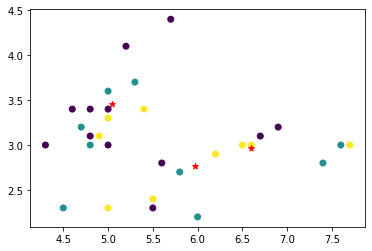

In [26]:
plt.scatter(x = x_test['sepal length (cm)'], y = x_test['sepal width (cm)'], c = y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c = 'r', marker = '*')

In [27]:
new_data = data.drop(['variety'], axis = 1)
new_data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(new_data)

kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

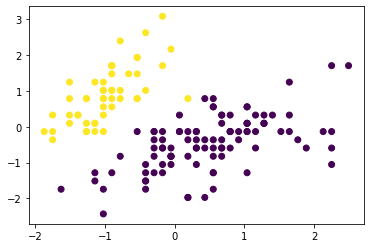

In [35]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = clusters)

#вроде как будет удобнее разбить на 2 кластера, а не на три, но я бы посмотерла еще и на график локтя 

In [36]:
k_inertia = []
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters = k)
    clusters_kmeans = clf_kmeans.fit_predict(new_data)
    k_inertia.append(clf_kmeans.inertia_)

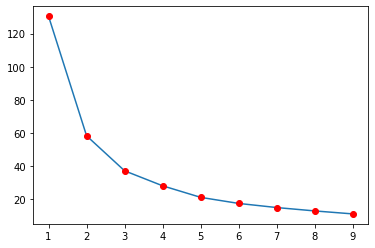

In [38]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

#Можно и н три разбить, но нагляднее будет на 2, между 2 и 3 малозаметная разница в сравнении 

In [42]:
aglo = AgglomerativeClustering(n_clusters = 2)
clusters = aglo.fit_predict(new_data)

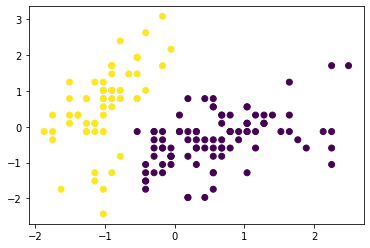

In [44]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = clusters)

#вроде плюс минус похожи, только средние точки сместились